# TDMA Extension (N-Diagonal Matrix Algorithm)

In [3]:
import scipy
from scipy.sparse import csr_matrix, lil_matrix
import numpy as np
from numpy import array
from copy import deepcopy
import time
import matplotlib.pyplot as plt

NDMA 알고리즘은 n개의 주대각성분을 가지는 선형 시스템을 해석  
TDMA의 방식을 확장하여 적용  
대각 성분으로부터 아래 방향으로 k개의 성분, 위쪽 방향으로 l개의 성분을 가지는 주대각행렬 해석  
O((k+l)*n) 의 시간복잡도

In [5]:
class solver:
    def __call__(self,A,B):
        pass

class TDMA(solver):
    def __init__(self):
        self.c_list=[]
        self.d_list=[]

    def __call__(self,a,b,c,d):
        data = TDMA.c_and_d(a,b,c,d)
        c_prime = data['c_prime']
        d_prime = data['d_prime']
        x = [0 for _ in range(len(b))]
        x[-1] = d_prime[-1]
        for i in range(len(b)-2,-1,-1):
            x[i] = d_prime[i] - c_prime[i] * x[i+1]
        return x

    def c_(a,b,c):
        domain = zip(a[:-1] , b[1:-1] , c[1:])
        result = [c[0] / b[0]]
        for a_current,b_current, c_current in domain:
            cprim_pre = result[-1]
            result.append(c_current / (b_current - a_current * cprim_pre))
        return result
    
    def c_and_d(a,b,c,d):
        c_list = TDMA.c_(a,b,c)
        result = [d[0] / b[0]]
        domain = zip(a,b[1:],c_list,d[1:])
        for a_current,b_current,cprim_pre,d_current in domain:
            dprim_pre = result[-1]
            result.append((d_current - a_current * dprim_pre) / (b_current - a_current * cprim_pre))
        return {"c_prime":c_list,"d_prime":result}
    
class NDMA(solver):
    def __call__(self,A_matrix:lil_matrix,B_Element:array,k,l):
        A_prime_matrix = deepcopy(A_matrix)
        B_prime_Element = deepcopy(B_Element)

        n = A_matrix.shape[0]

        for i in range(0,n):
            for j in range(max(0,i-k),i):
                corr = A_prime_matrix[i,j] / A_prime_matrix[j,j]
                A_prime_matrix[i] -= A_prime_matrix[j] * corr
                B_prime_Element[i] -= B_prime_Element[j] * corr
        
        for i in range(n-1,-1,-1):
            for j in range(min(n-1,i + l),i,-1):
                corr = A_prime_matrix[i,j] / A_prime_matrix[j,j]
                B_prime_Element[i] -= B_prime_Element[j] * corr

        x = [B_prime_Element[i] / A_prime_matrix[i,i] for i in range(0,n)]

        return x

In [6]:
def random_sparse_diagonal_matrix(n,k,l):
    result = np.zeros((n,n),dtype = np.float32)
    for i in range(-k,l+1):
        result += np.eye(n,k=i,dtype = np.float32) * np.random.rand(n,1)
    return result

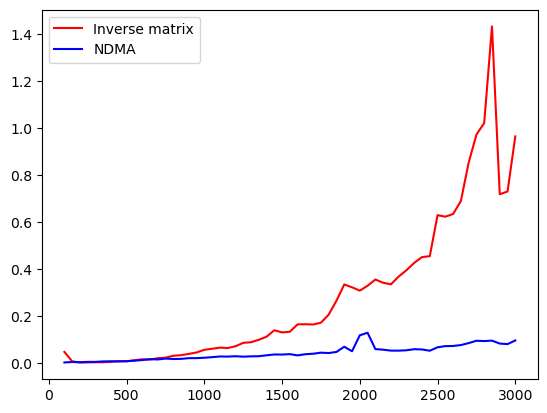

In [7]:
k = 4
l = 4

Inv_time = []
NDMA_time = []

x = range(100,3001,50)

for n in x:
    A = random_sparse_diagonal_matrix(n,k,l)
    B = np.random.rand(n)
    A_lil = lil_matrix(A)

    start_ture = time.time()

    x_ture = np.dot(np.linalg.inv(A),B.reshape(-1,1))

    end_ture = time.time()

    start_NDMA = time.time()

    x_NDMA = NDMA()(A,B,k,l)

    end_NDMA = time.time()

    Inv_time.append(end_ture - start_ture)
    NDMA_time.append(end_NDMA - start_NDMA)

plt.plot(x,Inv_time,'r',label = 'Inverse matrix')
plt.plot(x,NDMA_time,'b',label = 'NDMA')
plt.legend()

# Transform matrix

## 1-D
### Mass Conservation
$$
{\partial \rho \over \partial t} + {\partial \over \partial x} \rho u = 0
$$

### Momentum Conservation
$$
{\rho {\partial u \over \partial t}} + {u \over \epsilon ^2}{\partial \over \partial x}\rho u = - {\partial P \over \partial x} - {\mu \over K}u
$$

### Fluid Energy Equation
$$
{\partial \over \partial t}(\epsilon \rho \beta _h h_m) + {\partial \over \partial x}(\rho u h_m) = {\partial \over \partial x}(\Gamma {\partial h_m \over \partial x}) + q_sf
$$

### Solid Energy Equation
$$
{\partial \over \partial t}((1-\epsilon)\rho _s c_{p,s} T_s) = {\partial \over \partial x}(k_{s,eff} {\partial T_s \over \partial x}) - q_sf
$$